<a href="https://colab.research.google.com/github/d-hackmt/Lets-Paractice-Data-Cleaning-and-Analysis/blob/main/Covid_19__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid 19 small data set for understanding

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid19.csv to covid19.csv


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('covid19.csv')

In [ ]:
data.shape

(321, 6)

In [ ]:
data.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [ ]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [ ]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

##Lets visualize the data suing a heat map

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt


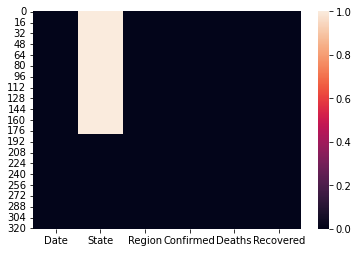

In [ ]:
sn.heatmap(data.isnull())
plt.show()

##Show the number of Confirmed , Deaths and Recovered cases in each region

In [ ]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [ ]:
data.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [ ]:
# for each column
data.groupby('Region')['Confirmed'].sum()

Region
Afghanistan           1939
Albania                766
Algeria               3848
Andorra                743
Angola                  27
                      ... 
West Bank and Gaza     344
Western Sahara           6
Yemen                    6
Zambia                  97
Zimbabwe                32
Name: Confirmed, Length: 187, dtype: int64

In [ ]:
# to display in asc or desc
data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(10) # top 10 

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

In [ ]:
# to display results of more than one column
data.groupby('Region')['Confirmed','Recovered'].sum()

<ipython-input-19-7ba5115071ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


##Remove all rcords where confirmed cases is less than 10

In [ ]:
data[data['Confirmed'] < 10 ]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [ ]:
#remove
data = data[~(data['Confirmed'] < 10 )]

##In which region maximum number of confirmed cases were recorded

##Imported dataset again here

In [ ]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

##In which region minimum number of confirmed cases were recorded

In [ ]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = True).head(20)

Region
Yemen                                6
Western Sahara                       6
Bhutan                               7
Papua New Guinea                     8
Sao Tome and Principe                8
Mauritania                           8
MS Zaandam                           9
Gambia                              10
Holy See                            10
Suriname                            10
Burundi                             11
Seychelles                          11
Nicaragua                           13
Saint Kitts and Nevis               15
Dominica                            16
Namibia                             16
Saint Vincent and the Grenadines    16
Saint Lucia                         17
Belize                              18
Fiji                                18
Name: Confirmed, dtype: int64

##In which region minimum number of Deaths were recorded

In [ ]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True).head(60)

Region
Laos                                0
Mongolia                            0
Mozambique                          0
Cambodia                            0
Fiji                                0
Namibia                             0
Nepal                               0
Madagascar                          0
Macau                               0
Papua New Guinea                    0
Rwanda                              0
Saint Kitts and Nevis               0
Bhutan                              0
Dominica                            0
Central African Republic            0
Saint Lucia                         0
Holy See                            0
Sao Tome and Principe               0
Yemen                               0
Western Sahara                      0
Eritrea                             0
Vietnam                             0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Grenada                             0
South

##How many Confirmed Deaths and recovered cases were reported from india till 29 april 2020

In [ ]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [ ]:
data[data['Region']=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


##Sort the entire data with respect to no of confirmed cases in ascending order

In [ ]:
data.sort_values(by = ['Confirmed'])

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


##Sort the entire data with respect to no of Recovered cases in descending order

In [ ]:
data.sort_values(by = ['Recovered'] , ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
285,4/29/2020,Recovered,US,0,0,120720
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,4/29/2020,Maryland,US,20849,1078,0
246,4/29/2020,Manitoba,Canada,275,6,0
243,4/29/2020,Louisiana,US,27660,1845,0
241,4/29/2020,Kentucky,US,4537,234,0
